# Social Good Hackathon - Covid19 and Texas Counties

# Data Exploration

## Two sets of cleaned data and the target data containing Covid19 cases and Covid19 deaths by county are loaded, combined, and analyzed.  The dataframe is then saved to a csv file.

Load common libraries.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
import sagemaker.amazon.common as smac
import sagemaker
from sagemaker import get_execution_role

In [8]:
role = get_execution_role()
input_bucket = 'texas-counties-covid19'

## Features

#### Load first cleaned dataset.

In [9]:
in_data_key = 'cleaned_data_1.csv'
data_location = 's3://{}/{}'.format(input_bucket, in_data_key)
df1=pd.read_csv(data_location)
print(df1.shape)
df1.head()

(254, 72)


,Median Age,% High School Graduate or Higher,% Bachelor s Degree or Higher,Unemployment Rate (%),Ethnicity: % Hispanic,Race: % White Alone,Race: % African American Alone,Race: % American Indian & Alaska Native Alone,Race: % Asian Alone,Race: % Native Hawaiian and Other Pacific Islander Alone,...,Age-Adjusted Death Rate,Motor Vehicle Mortality Rate,% Insufficient Sleep,% Enrolled in Free or Reduced Lunch,Segregation Index,% Homeowners,Years of Potential Life Lost Rate,% With Access to Exercise Opportunities,% Flu Vaccinated,Income inequality
0,39.1,80.2,11.8,3.6,17.82,75.11,21.49,0.68,0.90,0.14,...,569.0,20.0,35,59.0,31.0,71,10927.0,26,43.0,4.3
1,31.8,73.8,10.6,3.1,56.19,94.22,1.94,1.47,0.75,0.02,...,372.0,39.0,32,40.0,10.0,73,7138.0,94,24.0,4.3
2,37.1,79.9,15.7,5.1,22.18,81.27,15.44,0.75,1.17,0.06,...,462.0,19.0,35,67.0,37.0,66,8914.0,65,48.0,4.4
3,49.3,83.2,20.2,6.8,27.66,93.05,1.79,1.24,1.93,0.08,...,444.0,20.0,30,96.0,21.0,78,8770.0,81,42.0,5.3
4,44.3,90.1,21.8,3.4,8.68,95.58,1.03,1.42,0.43,0.03,...,384.0,29.0,29,29.0,27.0,84,8253.0,23,46.0,4.4


#### Load second cleaned dataset.

In [10]:
in_data_key = 'cleaned_data_2.csv'
data_location = 's3://{}/{}'.format(input_bucket, in_data_key)
df2=pd.read_csv(data_location)
print(df2.shape)
df2.head()

(254, 56)


,County,Percent Urban,Percent Rural,Enplanements,Number,customs_Y,hub_Y,Total Market Value,Total Actual Levy,Total County Tax Rate,...,Graduation Rate,% Some College,Labor Force,Association Rate,Average Daily PM2.5,% Severe Housing Problems,% Drive Alone,% Long Commute - Drives Alone,Yes,Policy Score
0,Anderson,32.94,67.06,13.0,1.0,0.0,0.0,4.058915e+09,15833018.0,0.590892,...,91.1,38.247692,23751,10.593956,9.2,15.352197,85.212329,24.3,0,3.0
1,Andrews,83.50,16.50,0.0,1.0,0.0,0.0,5.154110e+09,28889823.0,0.603900,...,95.7,41.641271,8639,6.628003,7.2,11.367837,77.882533,26.3,1,NaN
2,Angelina,56.92,43.08,22.0,1.0,0.0,0.0,5.548157e+09,18372078.0,0.437121,...,92.4,53.806967,36713,11.104187,9.3,16.634241,81.825769,14.8,1,3.0
3,Aransas,72.74,27.26,34.0,1.0,0.0,0.0,3.023165e+09,13196810.0,0.466022,...,91.4,47.625301,10016,7.889546,7.7,15.916230,80.985464,27.0,0,NaN
4,Archer,11.01,88.99,0.0,1.0,0.0,0.0,1.843360e+09,4355848.0,0.664240,...,98.5,62.716450,4074,12.621916,8.0,9.895052,87.062691,21.1,1,NaN


#### Modify county to be uniform on both cleaned datasets.

In [11]:
county=df1['County'].str.strip(' ')
county=county.str.replace(' ', '')
county=county.str.title()
df1['County']=county
df1.sort_values(by='County', inplace=True)
county=df2['County'].str.strip(' ')
county=county.str.replace(' ', '')
county=county.str.title()
df2['County']=county
df2.sort_values(by='County', inplace=True)

In [12]:
df1['County'].iloc[50:70]

50       Cottle
51        Crane
52     Crockett
53       Crosby
54    Culberson
55       Dallam
56       Dallas
57       Dawson
58    Deafsmith
59        Delta
60       Denton
61       Dewitt
62      Dickens
63       Dimmit
64       Donley
65        Duval
66     Eastland
67        Ector
68      Edwards
70        Ellis
Name: County, dtype: object

In [13]:
df2['County'].iloc[50:70]

50       Cottle
51        Crane
52     Crockett
53       Crosby
54    Culberson
55       Dallam
56       Dallas
57       Dawson
58    Deafsmith
59        Delta
60       Denton
61       Dewitt
62      Dickens
63       Dimmit
64       Donley
65        Duval
66     Eastland
67        Ector
68      Edwards
70        Ellis
Name: County, dtype: object

#### Set index for both dataframes to be the County and merge into one dataframe.

In [14]:
df1.set_index('County', inplace=True)
df2.set_index('County', inplace=True)

In [15]:
features=pd.merge(df1, df2, left_index=True, right_index=True)
print(features.shape)
features.info()

(254, 126)
<class 'pandas.core.frame.DataFrame'>
Index: 254 entries, Anderson to Zavala
Columns: 126 entries, Median Age to Policy Score
dtypes: float64(120), int64(6)
memory usage: 262.0+ KB


## Target

In [16]:
in_data_key = 'Texas COVID-19 Fatality Count_min.csv'
data_location = 's3://{}/{}'.format(input_bucket, in_data_key)
target=pd.read_csv(data_location)
print(target.shape)
target.head()

(254, 4)


,County,COVID cases Aug_4,COVID deaths Aug_4,Unnamed: 3
0,Anderson,2329,9,NaN
1,Andrews,268,6,NaN
2,Angelina,1745,36,NaN
3,Aransas,158,12,NaN
4,Archer,20,0,NaN


In [17]:
target['County']=target['County'].str.strip(' ')
target['County']=target['County'].str.replace(' ', '')
target['County']=target['County'].str.title()
target.sort_values(by='County', inplace=True)
target.set_index('County', inplace=True)
target=target.iloc[:, :2]

## Visualizations

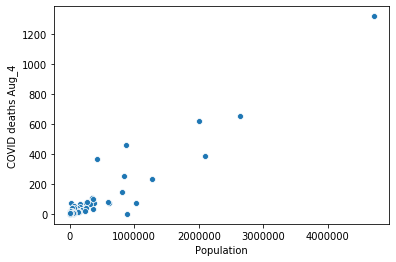

In [18]:
sns.scatterplot(features['Population'], target['COVID deaths Aug_4'])

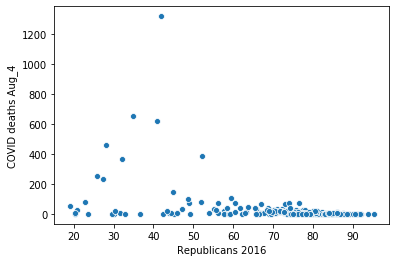

In [19]:
sns.scatterplot(features['Republicans 2016'], target['COVID deaths Aug_4'])

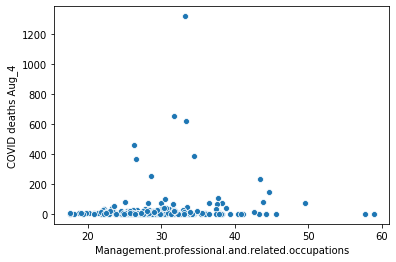

In [20]:
sns.scatterplot(features['Management.professional.and.related.occupations'], target['COVID deaths Aug_4'])

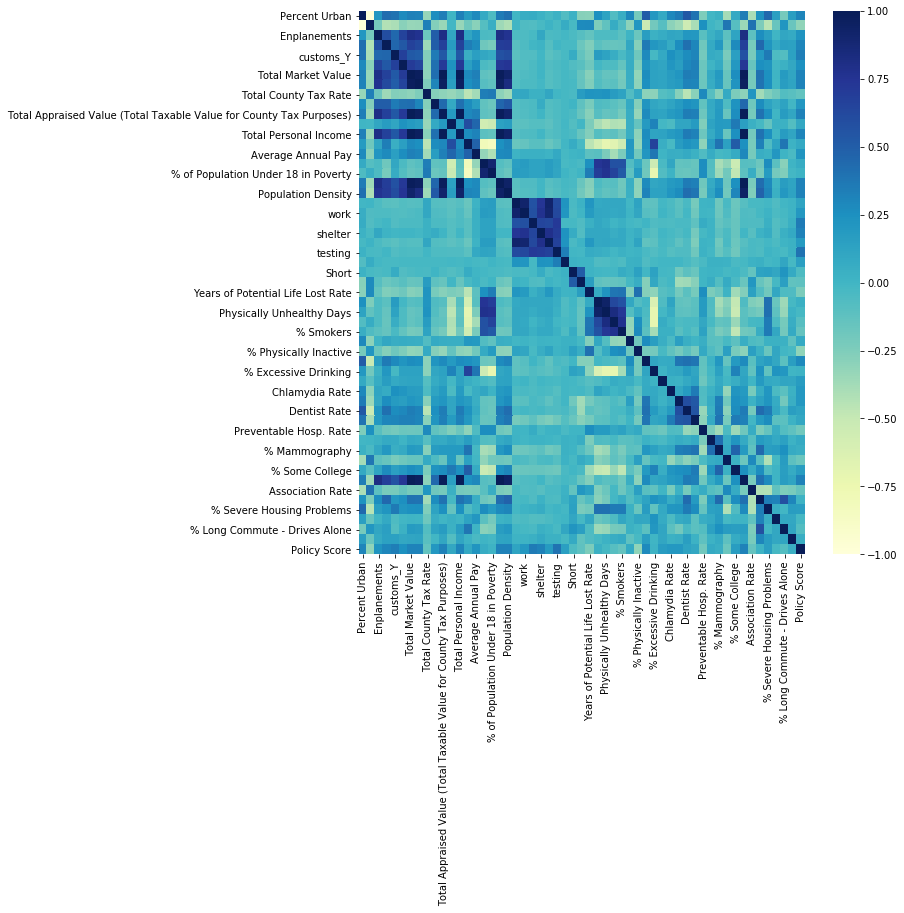

In [21]:
df2_corr=df2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df2_corr, cmap="YlGnBu")

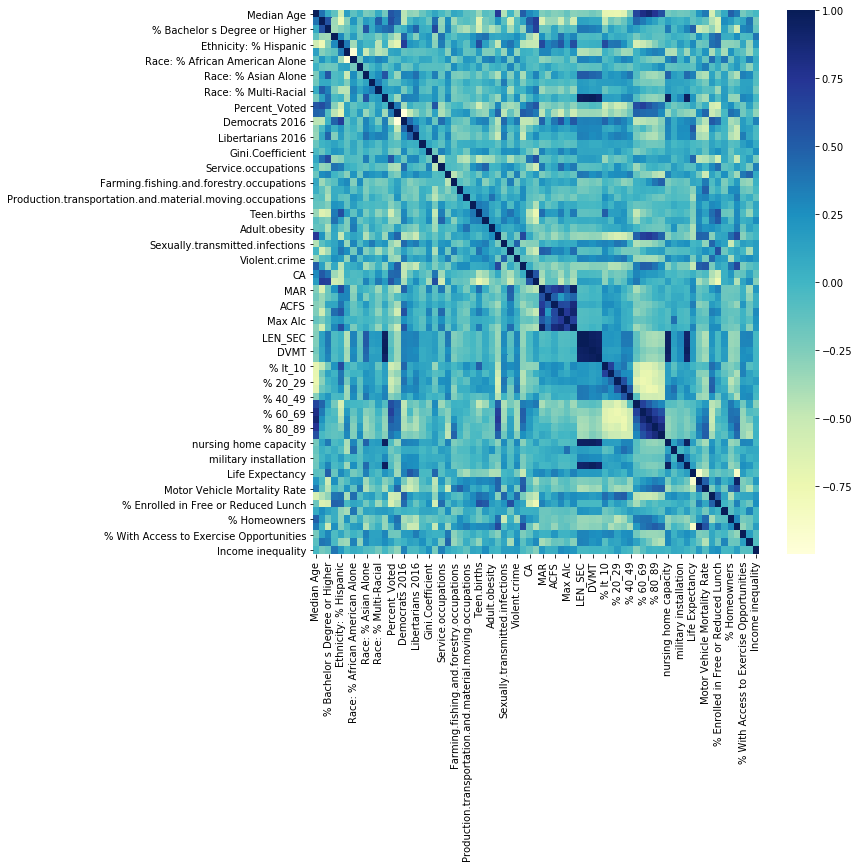

In [22]:
df1_corr=df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df1_corr, cmap="YlGnBu")

#### Save combined features to csv file.

In [23]:
in_data_key = 'combined_data.csv'
data_location = 's3://{}/{}'.format(input_bucket, in_data_key)
features.to_csv(data_location)